The goal of this homwork:
- Identify potential sources of bias in at least two of the three datasets
- Describe how dataset bias could lead to potential unintended negative consequences of using machine learning models trained on these datasets (or the datasets themselves) in scientific research and/or data-driven software applications
- Suggest how these sources of bias could be corrected or otherwise accounted for in order to avoid these unintended consequences
- Demonstrate that you are able to use the literate programming capabilities of Jupyter Notebooks in order to document your analysis (in programming cells, tables, and graphs) and your insights, questions, and explanations (in markdown cells) within the same document.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Annotated datasets was downloaded from https://figshare.com/articles/dataset/Wikipedia_Talk_Labels_Aggression/4267550
In the following cell, I am reading the data

In [2]:
agression_worker_demog = pd.read_csv('/Users/sdibay/Downloads/aggression_worker_demographics.tsv', sep='\t')
aggression_annotation = pd.read_csv('/Users/sdibay/Downloads/aggression_annotations.tsv', sep='\t')

Finding the common column to merge the two dataset to investigate two question:
    1- 
    2- 

In [3]:
agression_worker_demog.head()

,worker_id,gender,english_first_language,age_group,education
0,833,female,0,45-60,bachelors
1,1072,male,0,30-45,bachelors
2,872,male,0,18-30,hs
3,2116,male,0,30-45,professional
4,453,male,0,30-45,hs


Calculating the number of men and women of crowdworkers

In [29]:
agression_worker_demog['worker_id'].astype(int).groupby(df['gender']).sum()

gender
female     967396
male      1633345
Name: worker_id, dtype: int64

Calculating the number of crowdworkers with English as their first language

In [31]:
agression_worker_demog['worker_id'].astype(int).groupby(df['english_first_language']).sum()

english_first_language
0.0    2217777
1.0     382964
Name: worker_id, dtype: int64

In [ ]:
Calculating the number of female and male crowdworkers by degree levels

In [37]:
a =  pd.DataFrame(agression_worker_demog['worker_id'].astype(int).groupby(df['education']).sum())
a

,worker_id
education,
bachelors,1065448
doctorate,26497
hs,723015
masters,446289
professional,289346
some,50146


In [58]:
a.columns

Index(['worker_id'], dtype='object')

In [54]:
# percent beachelors or higher
all_crowdworkers = a.sum() 

if (a.education== bachelors):
    bachelor_higher = a.sum()

AttributeError: 'DataFrame' object has no attribute 'education'

Calculating the number of female and male crowdworkers by language they speak

In [32]:
pd.crosstab(agression_worker_demog.gender,agression_worker_demog.english_first_language)

english_first_language,0,1
gender,,
female,637,203
male,1150,199
other,1,0


Table 1. Demographic information of the crowdworker in aggressin document 

||Female|Male||
-|-|-|-
English first language|673 (72%)|1150(85%)|
Bachelor degree or higher||Cell|



In [4]:
aggression_annotation.head()

,rev_id,worker_id,aggression,aggression_score
0,37675,1362,1.0,-1.0
1,37675,2408,0.0,1.0
2,37675,1493,0.0,0.0
3,37675,1439,0.0,0.0
4,37675,170,0.0,0.0


In [5]:
df = pd.merge(left=aggression_annotation, right=agression_worker_demog, how='left', left_on='worker_id', right_on='worker_id')
df = pd.DataFrame (df)
df.head()

,rev_id,worker_id,aggression,aggression_score,gender,english_first_language,age_group,education
0,37675,1362,1.0,-1.0,male,0.0,18-30,masters
1,37675,2408,0.0,1.0,male,1.0,30-45,hs
2,37675,1493,0.0,0.0,female,0.0,30-45,bachelors
3,37675,1439,0.0,0.0,male,0.0,18-30,hs
4,37675,170,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
df['aggression'].astype(int).groupby(df['gender']).sum()

gender
female    60602
male      96127
other        37
Name: aggression, dtype: int64

In [15]:
df['aggression'].describe()

count    1.365217e+06
mean     1.830207e-01
std      3.866837e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: aggression, dtype: float64

In [22]:
ct= pd.crosstab(df.gender,df.aggression)

aggression,0.0,1.0
gender,,
female,247501,60602
male,451201,96127
other,46,37


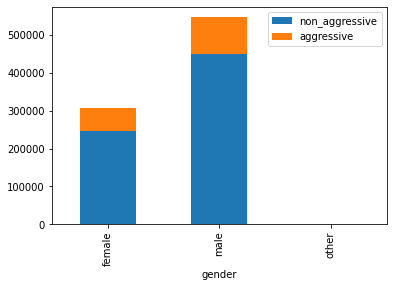

In [20]:
ct.plot.bar(stacked=True)
plt.legend(title='Aggression')
plt.legend(['non_aggressive', 'aggressive'])
plt.show()

In [25]:
ca= pd.crosstab(df.english_first_language,df.aggression)

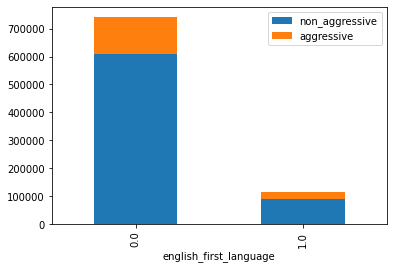

In [26]:
ca.plot.bar(stacked=True)
plt.legend(title='Aggression')
plt.legend(['non_aggressive', 'aggressive'])
plt.show()